## SCI 498 - 410: Online Social Network Analysis
### Lecture 3
<br><br>
### Aron Culotta
### Illinois Institute of Technology  


<br><br><br>

### Last Time:
- json
- pandas
- discuss data for each project
- work on reading your data

### Today:
- Understanding Twitter data
- Twitter API
- Drawing simple graphs with networkx

<br><br><br><br><br><br>

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max <strike>140</strike> 280 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[Search API](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://developer.twitter.com/en/docs/tweets/filter-realtime/overview)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br>
List of all endpoints:

https://developer.twitter.com/en/docs/api-reference-index

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://developer.twitter.com/en/docs/basics/authentication/overview/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://apps.twitter.com/
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries
<br><br><br><br><br><br>


Your project repo has an example of how to store credentials in a file:  
<https://github.com/tapilab/elevate-osna-starter/blob/master/credentials.json>
    
```
{"consumer_key": "xxx", "consumer_secret": "xxx", "access_token": "xxx", "token_secret": "xxx"}
```

In [7]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# You'll need to edit credentials.json with your own tokens.
import json
from TwitterAPI import TwitterAPI

def get_twitter(credential_file):
    """ Read the credential_file and construct an instance of TwitterAPI.
    Args:
      credential_file ... A JSON file with twitter tokens
    Returns:
      An instance of TwitterAPI.
    """
    tokens = json.loads(open(credential_file).read())
    twitter = TwitterAPI(
        tokens['consumer_key'],
        tokens['consumer_secret'],
        tokens['access_token'],
        tokens['token_secret']        
        )
    return twitter

twitter = get_twitter('credentials.json')
print('Established Twitter connection.')

Established Twitter connection.


In [8]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [9]:
type(12.6)

float

In [10]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [11]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [12]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [13]:
# What object is returned?
# builtin type method will tell us.
print(type(request))
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [14]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [15]:
# Python tip: List comprehensions
for i in [1,2,3]:
    print(i)

1
2
3


In [16]:
print([i*2 + 3 for i in [1,2,3]])

[5, 7, 9]


In [17]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/3/tutorial/datastructures.html

In [18]:
print('found %d tweets' % len(tweets))

found 12 tweets


In [19]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [20]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg

In [21]:
# Print keys.
sorted(a_tweet.keys())

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'place',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

In [22]:
# The text.
print(a_tweet['text'])
print(a_tweet['created_at'])

RT @Marissa_Jae: Watch here as Sister Pat Murphy, 90, is arrested and led out. Sister Pat works with migrants and refugees in Chicago, and…
Fri Jul 19 02:50:18 +0000 2019


In [23]:
# What is a user?...another dict
a_tweet['user']

{'id': 2995843178,
 'id_str': '2995843178',
 'name': 'Ann Collins',
 'screen_name': 'bacollins19',
 'location': 'Louisiana, USA',
 'description': '#PRU   #MLK50     🌊#PostcardsToVoters #TheResistance #BlackLivesMatter #TakeAKnee #fbr #Neverthelessshepersisted',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 9691,
 'friends_count': 9550,
 'listed_count': 4,
 'created_at': 'Sun Jan 25 12:33:22 +0000 2015',
 'favourites_count': 39678,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 16928,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/p

In [24]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' %
      (user['screen_name'], user['name'], user['location']))

screen_name=bacollins19, name=Ann Collins, location=Louisiana, USA


In [25]:
# Who follows this person?
# https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-followers-list
screen_name = user['screen_name']
request = twitter.request('followers/list', 
                          {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for bacollins19


In [26]:
type(followers[0])

dict

In [27]:
list(followers[0].keys())

['id',
 'id_str',
 'name',
 'screen_name',
 'location',
 'description',
 'url',
 'entities',
 'protected',
 'followers_count',
 'friends_count',
 'listed_count',
 'created_at',
 'favourites_count',
 'utc_offset',
 'time_zone',
 'geo_enabled',
 'verified',
 'statuses_count',
 'lang',
 'status',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'has_extended_profile',
 'default_profile',
 'default_profile_image',
 'following',
 'live_following',
 'follow_request_sent',
 'notifications',
 'muting',
 'blocking',
 'blocked_by',
 'translator_type']

In [28]:
# screen name of first follower of this user
followers[0]['screen_name']

'Parsimony1952'

In [29]:
# What happens if we get an error?
request = twitter.request('followers/list',
                          {'screen_name': 'this_is_not_a_valid_screen_name',
                           'count':200})

In [30]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [31]:
request.status_code

404

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://developer.twitter.com/en/docs/basics/rate-limits
  - e.g., 450 search requests in 15 minute window

In [32]:
# Dealing with rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' 
                  % request.text)
            time.sleep(61 * 15)

<br><br><br>

## Drawing graphs with NetworkX

In [33]:
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [34]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

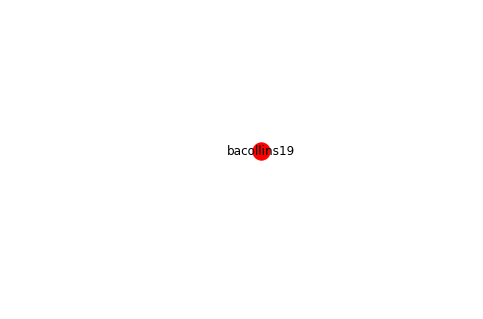

In [35]:
nx.draw(graph, with_labels=True)

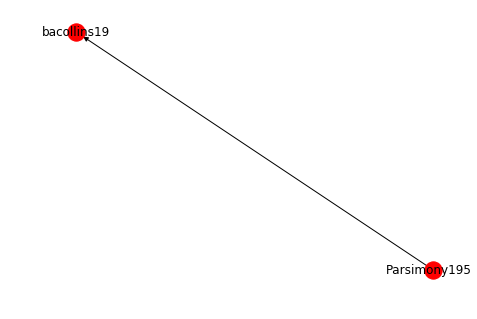

In [36]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

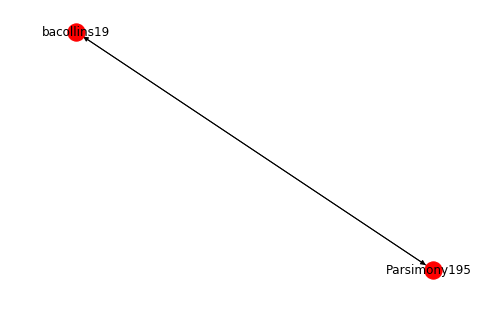

In [37]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [38]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                              {'screen_name': screen_name,
                                               'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 200 tweets for user bacollins19


In [39]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

RT @Marissa_Jae: Watch here as Sister Pat Murphy, 90, is arrested and led out. Sister Pat works with migrants and refugees in Chicago, and…
RT @attorneylsg: He speaks softly 💙
But carries a big stick 🇺🇸 https://t.co/A5fQT2E6U2
RT @KathiInCali: @BarackObama #ObamaPleaseComeBack
#WeNeedPresidentObama
#WeMissPresidentObama❤️
RT @rhonda_harbison: @BarackObama https://t.co/icz3aHPO3n
RT @KikiAdine: @BarackObama A beautiful man. A beautiful mind. A beautiful soul. A beautiful leader. #MandelaDay
RT @Htygrett1: @BarackObama https://t.co/wKiFRbXp1K
RT @Brygida_Poland: @kathrynresister @BarackObama He is missed everywhere in the world.
RT @kathrynresister: @BarackObama Thank you for your words of wisdom President Obama. Miss you and your family very much.
RT @HeIsUNFIT2Lead: @BarackObama We miss you President Obama!
RT @DearAuntCrabby: 'Send her back!' chant shows Trump's ugly plan to get reelected

I have never, ever said that I am ashamed to be white.…
RT @InactionNever: AMERICA 👇🏾

A Muslim 

In [42]:
from collections import Counter
# Recall: Counter is just a fancy dict mapping from object->int, starting at 0.
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [43]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespace.
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1642 unique terms in 200 tweets


[('rt', 172),
 ('the', 91),
 ('to', 63),
 ('a', 62),
 ('of', 54),
 ('is', 43),
 ('and', 40),
 ('in', 39),
 ('you', 39),
 ('i', 32)]

In [44]:
# Python tip: sorting using lambda functions
sorted([5, 4, -10, -1], key=lambda x: -x)

[5, 4, -1, -10]

In [45]:
sorted([('joe', 10), ('mary', 20), ('jim', 15), ('joe', 5)],
         key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [46]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

# print top 50
print('\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts[:50]))

rt=172
the=91
to=63
a=62
of=54
is=43
and=40
in=39
you=39
i=32
this=31
for=28
that=26
on=21
@realdonaldtrump=18
trump=18
with=16
are=16
have=14
was=14
from=14
#lightsforliberty=14
he=12
we=12
so=11
an=11
they=10
about=10
not=10
@mihero=10
@wrath_of_comm:=10
your=9
president=9
be=9
&amp;=9
one=9
but=8
thank=8
her=8
by=8
all=8
me=8
if=8
tell=8
or=8
at=8
#closetheconcentrationcamps=8
@barackobama=7
it=7
when=7


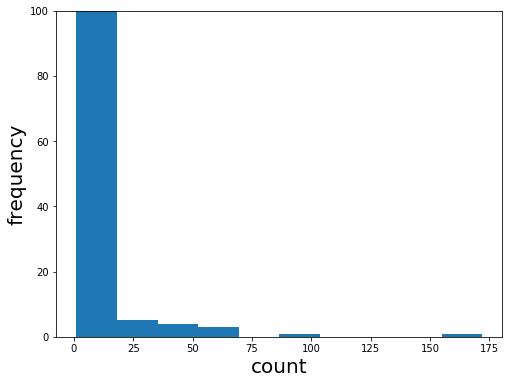

In [47]:
# Plot these counts using matplotlib
plt.figure(figsize=(8,6))
plt.hist(list(counts.values()), bins=10)
plt.xlabel('count', size=20)
plt.ylabel('frequency', size=20)
plt.ylim((0,100))
plt.show()

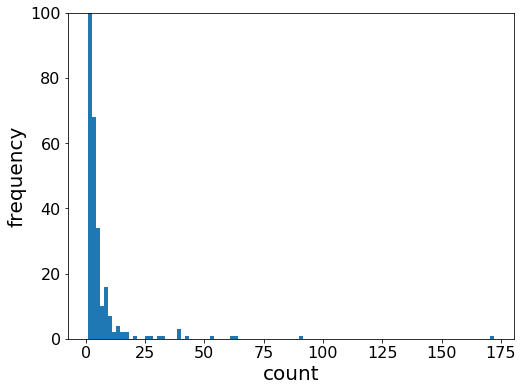

In [48]:
# resizing things in matplotlib
# Plot these counts using matplotlib
plt.rc('font', size=20)                  # controls default text sizes
plt.rc('axes', titlesize=20)             # fontsize of the axes title
plt.rc('axes', labelsize=20)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)            # fontsize of the tick labels
plt.rc('ytick', labelsize=16)            # fontsize of the tick labels
plt.figure(figsize=(8,6))
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,100))
plt.show()

**Zipf's Law**: (roughly) there are many rare words; there are a small number of extremely frequent words.

Alternatively:   
The frequency of a term is inversely proportional to its rank.

Let $f_i$ be the frequency of the $i$th most common term.

$$ f_i \propto \frac{1}{i} $$

equivalently

$ f_i = k$ $i^b $ for constant $k$ and $b=-1$

In [49]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[172, 91, 63, 62, 54, 43, 40, 39, 39, 32]

In [50]:
ranks = list(range(1, len(freqs)+1))
ranks[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [51]:
# Minimize mean squared error to find best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

In [52]:
# Define the Zipf function and fit the k parameter.
def zipfs(i, k):
    return k / i
zipf_parms, covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is f_i = %.2f*i^-1' % zipf_parms[0])

Zipf fit is f_i = 195.50*i^-1


Text(0, 0.5, 'log(frequency)')

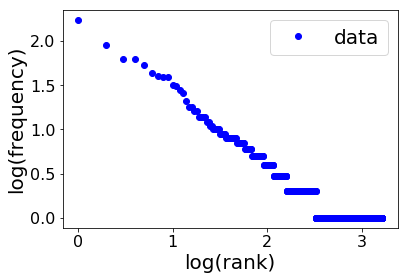

In [53]:
# Try a log-log plot.
# NumPy library will be used a lot for math.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.figure()
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

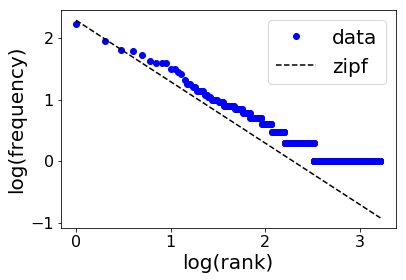

In [54]:
plt.figure()
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')

Zipf's law holds with varying degrees of accuracy depending on the dataset.

Here, due in part to the small dataset, there are many more words that occur only once than expected by Zipf.

In [1]:
from IPython.core.display import HTML
HTML(open('../custom.css').read())